In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv("Cleaned.csv")

In [11]:
## Selecting Features 
df_ = df[["Age", "Gender", "Height", "Weight",
                  "BMI"]]
df_

,Age,Gender,Height,Weight,BMI
0,50,2,168,62.0,21.967120
1,55,1,156,85.0,34.927679
2,52,1,165,64.0,23.507805
3,48,2,169,82.0,28.710479
4,48,1,156,56.0,23.011177
...,...,...,...,...,...
66169,53,2,168,76.0,26.927438
66170,62,1,158,126.0,50.472681
66171,52,2,183,105.0,31.353579
66172,61,1,163,72.0,27.099251


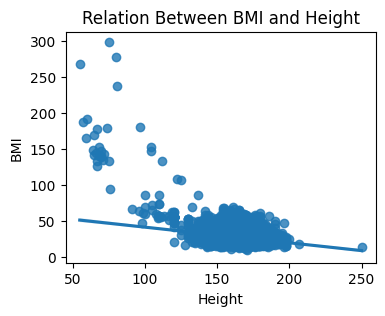

In [6]:
plt.figure(figsize=(4, 3))

sns.regplot(x = "Height", y="BMI", data=df_)

plt.title("Relation Between BMI and Height")
plt.show()

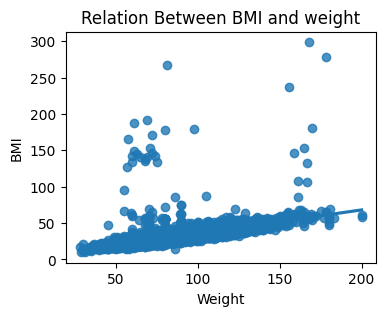

In [7]:
plt.figure(figsize=(4, 3))

sns.regplot(x = "Weight", y="BMI", data=df_)

plt.title("Relation Between BMI and weight")
plt.show()

In [9]:
# to remove extreme outliers 
n_df = df_[(df_["Weight"] <= 150) & (df_["Height"] <= 200)]

In [12]:
n_df.describe()

,Age,Gender,Height,Weight,BMI
count,66113.000000,66113.00000,66113.000000,66113.000000,66113.000000
mean,53.328498,1.35704,164.348010,74.503415,27.662012
std,6.803283,0.47913,8.306109,14.349326,5.815917
min,30.000000,1.00000,55.000000,28.000000,9.917581
25%,48.000000,1.00000,159.000000,65.000000,23.875433
50%,54.000000,1.00000,165.000000,72.000000,26.573129
75%,58.000000,2.00000,170.000000,83.000000,30.468750
max,65.000000,2.00000,200.000000,150.000000,267.768595


In [13]:
lm = LinearRegression()

In [15]:
# to split data in train and test data 
msk = np.random.rand(len(n_df)) < 0.8 
train, test = n_df[msk], n_df[~msk]

In [17]:
train_x = train[["Weight", "Height"]].values.reshape(-1, 2) # Selecting columns, converting to Numpy array, and reshaping
train_y = train["BMI"].array.reshape(-1, 1)

In [18]:
## fiting my model 
lm.fit(train_x, train_y)

LinearRegression()

In [19]:
print("Coefficeints: ", lm.coef_)

Coefficeints:  [[ 0.38334131 -0.39539919]]


In [20]:
test_x = test[["Weight", "Height"]].values.reshape(-1, 2)
test_y = test["BMI"].array.reshape(-1, 1)
yhat = lm.predict(test_x)

print("Mean Squared Error (MSE) : %.2f"
      % np.mean((yhat - test_y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(test_x, test_y))

Mean Squared Error (MSE) : 4.41
Variance score: 0.88


In [22]:
data = np.array([111, 178])
data = data.reshape(-1, 2)
new_d = lm.predict(data)
print(new_d)

[[36.25290447]]
